In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [272]:
df = pd.read_csv('data.csv',encoding = 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [273]:
df.shape

(541909, 8)

## Data Cleaning

In [274]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [228]:
## we have to drop customer id column whose value are null
## there is no need to play with discription column

In [229]:
## there is 1.35L nan value in customer id or when we drop all nan value from dataframe it approx near about 1.4L. So without manipualte the customer id column I simply drop all nan value.

In [230]:
df = df.dropna(how='any',axis=0)

In [231]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [275]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## Data Preprocessing

In [276]:
## first I make a new column of total price of every StockCode 
## total price = Unit price * quantity

In [277]:
df['Total_bill'] = df['UnitPrice']*df['Quantity']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_bill
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [ ]:
## There are lot of duplicates values in Invoice number

In [278]:
## we have to groupby on customer id because we can find out the total spend by each customer

In [279]:
total_buy_per_customer = df.groupby('CustomerID')['Total_bill'].sum()
total_buy_per_customer[17850]

5288.63

In [280]:
 ## here we cross check the above amount which is 1224 $ is spend in total by this customer id

In [281]:
df[df['CustomerID']==17850]['Total_bill'].sum()

5288.630000000001

In [238]:
total_buy_per_customer

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: Total_bill, Length: 4372, dtype: float64

In [239]:
cust_id = total_buy_per_customer.index
cust_id

Float64Index([12346.0, 12347.0, 12348.0, 12349.0, 12350.0, 12352.0, 12353.0,
              12354.0, 12355.0, 12356.0,
              ...
              18273.0, 18274.0, 18276.0, 18277.0, 18278.0, 18280.0, 18281.0,
              18282.0, 18283.0, 18287.0],
             dtype='float64', name='CustomerID', length=4372)

In [240]:
total_spend = total_buy_per_customer.values
total_spend

array([   0.  , 4310.  , 1797.24, ...,  176.6 , 2094.88, 1837.28])

In [241]:
total_quantity_per_customer = df.groupby('CustomerID')['Quantity'].sum()
total_quantity = total_quantity_per_customer.values
total_quantity

array([   0, 2458, 2341, ...,   98, 1397, 1586], dtype=int64)

In [282]:
## by making new columns I build a different datafram called df1 which have columns (customer_id , total_spend per customer , total_quantity per customer) )

In [284]:
df1 = pd.DataFrame(columns=['cust_id','total_spend','total_quantity'])
df1['cust_id']=cust_id
df1['total_spend'] = total_spend
df1['total_quantity'] = total_quantity
df1

,cust_id,total_spend,total_quantity
0,12346.0,0.00,0
1,12347.0,4310.00,2458
2,12348.0,1797.24,2341
3,12349.0,1757.55,631
4,12350.0,334.40,197
...,...,...,...
4367,18280.0,180.60,45
4368,18281.0,80.82,54
4369,18282.0,176.60,98
4370,18283.0,2094.88,1397


In [285]:
## After creating thid dataframe, I saw total_spend columns values are in float so, I remove all the decimal part from this

In [244]:
str(df1['total_spend'][1]).split('.')[0]

'4310'

In [286]:
total_spen = []
for i in df1['total_spend']:
    i = str(i).split('.')[0]
    i1 = int(i)
    total_spen.append(i1)
total_spen
df1['total_spend']=total_spen
df1

,cust_id,total_spend,total_quantity
0,12346.0,0,0
1,12347.0,4310,2458
2,12348.0,1797,2341
3,12349.0,1757,631
4,12350.0,334,197
...,...,...,...
4367,18280.0,180,45
4368,18281.0,80,54
4369,18282.0,176,98
4370,18283.0,2094,1397


## Data Visualization

In [289]:
## I visualize but there are some outliers or we can se some customers whi spend more than 1.5lac 
## But I don't remove these outliers because these customers seems valuable to me.

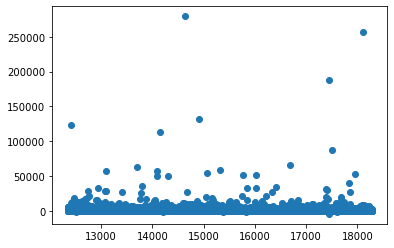

In [288]:
plt.scatter(cust_id,total_spend)

## Building Model

In [290]:
x2 = df1.iloc[:,1:3].values
x2

array([[   0,    0],
       [4310, 2458],
       [1797, 2341],
       ...,
       [ 176,   98],
       [2094, 1397],
       [1837, 1586]], dtype=int64)

In [293]:
## I use k-means clustering because we don't have specific categories in given, so I have to buils the suitable categories, so, I thought k-means will do this work better.

In [294]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

In [295]:
wcss

[390735252053.94617,
 144650116526.47552,
 79358961479.64087,
 52207558643.29215,
 35646742043.64207,
 24702960196.223305,
 18204385885.18156,
 14471201531.52612,
 11277109214.380419,
 9048076211.86663]

In [296]:
## I use elbow method to find the no of cluster I need

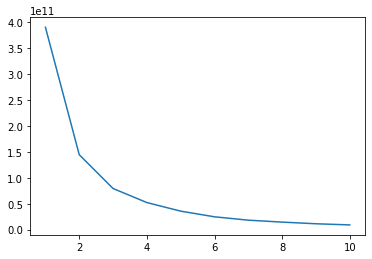

In [297]:
plt.plot(range(1,11),wcss)

In [298]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++')
y_kmeans = kmeans.fit_predict(x2)

In [299]:
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [303]:
df2 = pd.concat([df1,pd.DataFrame(y_kmeans)],axis=1)
df2.head()

,cust_id,total_spend,total_quantity,0
0,12346.0,0,0,0
1,12347.0,4310,2458,0
2,12348.0,1797,2341,0
3,12349.0,1757,631,0
4,12350.0,334,197,0


In [306]:
len(df2[df2[0]==0])

4347

In [307]:
len(df2[df2[0]==1])

22

In [304]:
len(df2[df2[0]==2])

3

In [302]:
## there are in total 3 categories [0,1,2]
## In 0 category - 4347 customers in total who spend not much in greater value
## In 1 category - 3 customers in total who spend more than 1.5 lac ( they are outliers as we saw above)
## In 2 category - 22 customers in total who spend more than 20,000 

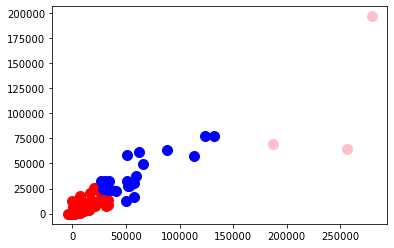

In [310]:
plt.scatter(x2[y_kmeans==0,0],x2[y_kmeans==0,1],s=100,c='red')
plt.scatter(x2[y_kmeans==1,0],x2[y_kmeans==1,1],s=100,c='blue')
plt.scatter(x2[y_kmeans==2,0],x2[y_kmeans==2,1],s=100,c='pink')

In [311]:
## might this be helpful to understand that blue color onwards all the customers are heavily spending 